In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [280]:
data = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Explore Data

In [281]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [282]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [283]:
data.sample(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
55,LP001194,Male,Yes,2,Graduate,No,2708,1167.0,97.0,360.0,1.0,Semiurban,Y
394,LP002266,Male,Yes,2,Graduate,No,3100,1400.0,113.0,360.0,1.0,Urban,Y
203,LP001688,Male,Yes,1,Not Graduate,No,3500,1083.0,135.0,360.0,1.0,Urban,Y


In [284]:
data.shape

(614, 13)

In [285]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [286]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [287]:
d = data.isnull().sum()
d[d > 0]

Gender              13
Married              3
Dependents          15
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
dtype: int64

<Axes: >

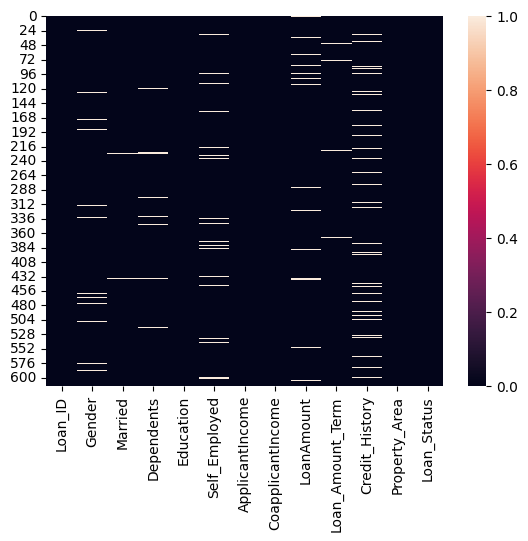

In [288]:
sns.heatmap(data.isnull())

###Clean Data

In [289]:
data = data.dropna()
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [290]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

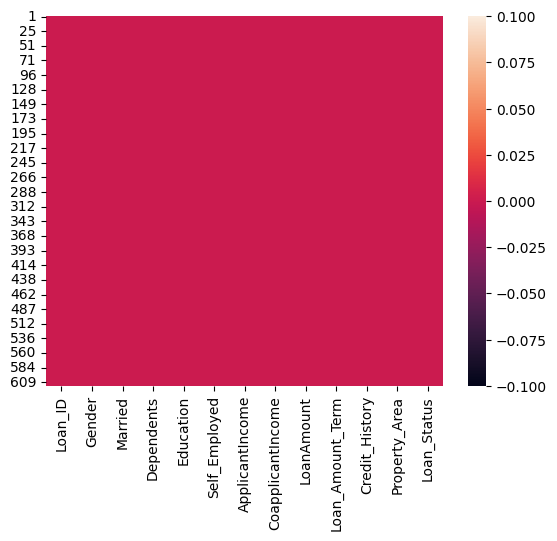

In [291]:
sns.heatmap(data.isnull())

In [292]:
data.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
609    False
610    False
611    False
612    False
613    False
Length: 480, dtype: bool

In [293]:
data.duplicated().sum()

0

In [294]:
data.Dependents.value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [295]:
data.replace(to_replace = '3+', value = 4, inplace = True)

<ipython-input-295-70b0671ad395>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace(to_replace = '3+', value = 4, inplace = True)


In [296]:
data.Dependents.value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

## Data Analysis

In [297]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


<Axes: >

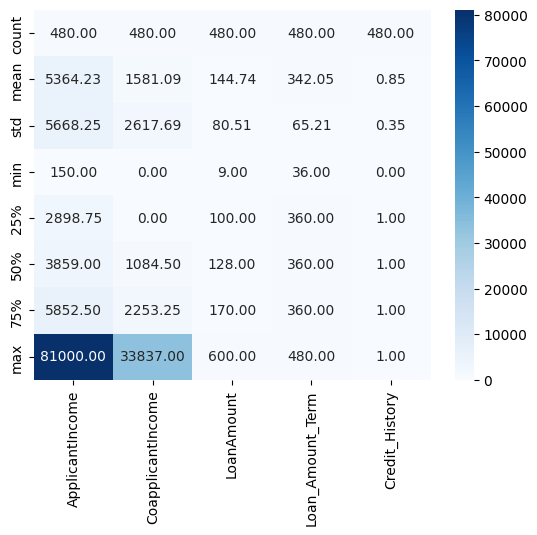

In [298]:
sns.heatmap(data.describe(), annot=True, fmt='0.2f', cmap='Blues')


<Axes: xlabel='Gender', ylabel='count'>

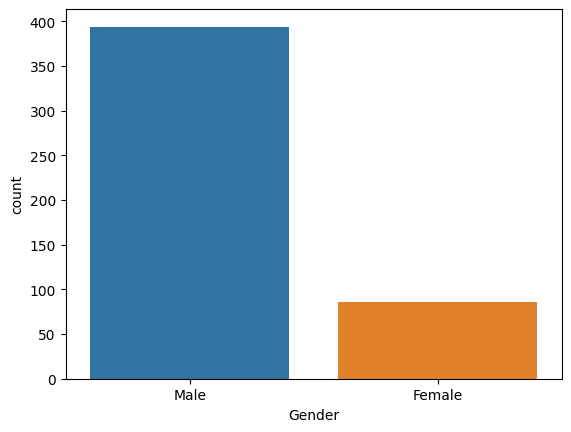

In [299]:
 sns.countplot(x = data.Gender)

Text(0.5, 1.0, 'this is graph')

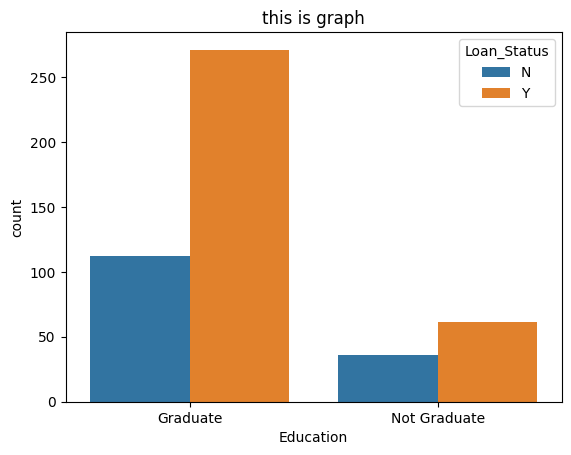

In [300]:
sns.countplot(x = data['Education'],hue = data['Loan_Status'])
plt.title('this is graph')

## Transform Data

In [ ]:
la = LabelEncoder()
data.Gender = la.fit_transform(data.Gender)
data.Married = la.fit_transform(data.Married)
data.Education = la.fit_transform(data.Education)
data.Self_Employed = la.fit_transform(data.Self_Employed)
data.Property_Area = la.fit_transform(data.Property_Area)

data.replace({'Loan_Status':{'Y':0,'N':1}},inplace=True)
data

In [ ]:
data['Dependents'] = pd.to_numeric(data['Dependents'], errors='coerce')
data['Dependents'].fillna(0, inplace=True)
data['Dependents'] = data['Dependents'].astype(int)

## Create Model

In [306]:
X = data.drop(['Loan_Status','Loan_ID'],axis = 1)
y = data.Loan_Status

In [307]:
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.20,shuffle=True,
                                                  random_state = 40 )

In [308]:
model = CatBoostClassifier(n_estimators = 170 )
model.fit(X_train,y_train)
score1 = model.score(X_train,y_train)
score2 = model.score(X_test,y_test)
print("score train is",score1,"score test is",score2)

Learning rate set to 0.034763
0:	learn: 0.6836343	total: 1.78ms	remaining: 302ms
1:	learn: 0.6742396	total: 3ms	remaining: 252ms
2:	learn: 0.6642629	total: 4.16ms	remaining: 232ms
3:	learn: 0.6546206	total: 5.52ms	remaining: 229ms
4:	learn: 0.6474577	total: 6.65ms	remaining: 219ms
5:	learn: 0.6385909	total: 7.13ms	remaining: 195ms
6:	learn: 0.6306848	total: 8.25ms	remaining: 192ms
7:	learn: 0.6241415	total: 9.52ms	remaining: 193ms
8:	learn: 0.6179532	total: 10.6ms	remaining: 190ms
9:	learn: 0.6120121	total: 11.7ms	remaining: 188ms
10:	learn: 0.6064386	total: 12.8ms	remaining: 185ms
11:	learn: 0.5999342	total: 14.2ms	remaining: 186ms
12:	learn: 0.5942978	total: 15.2ms	remaining: 184ms
13:	learn: 0.5894556	total: 16.3ms	remaining: 182ms
14:	learn: 0.5838338	total: 16.9ms	remaining: 174ms
15:	learn: 0.5793558	total: 17.9ms	remaining: 173ms
16:	learn: 0.5740805	total: 18.5ms	remaining: 166ms
17:	learn: 0.5700045	total: 19.6ms	remaining: 165ms
18:	learn: 0.5657934	total: 20.7ms	remaining: 1

In [310]:
from sklearn.metrics import confusion_matrix, classification_report

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
report_train = classification_report(y_train, y_train_pred)

cm_test = confusion_matrix(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred)

print("Training Confusion Matrix:\n", cm_train)
print("Training Classification Report:\n", report_train)
print("Test Confusion Matrix:\n", cm_test)
print("Test Classification Report:\n", report_test)


Training Confusion Matrix:
 [[256   4]
 [ 65  59]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88       260
           1       0.94      0.48      0.63       124

    accuracy                           0.82       384
   macro avg       0.87      0.73      0.76       384
weighted avg       0.84      0.82      0.80       384

Test Confusion Matrix:
 [[70  2]
 [12 12]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91        72
           1       0.86      0.50      0.63        24

    accuracy                           0.85        96
   macro avg       0.86      0.74      0.77        96
weighted avg       0.85      0.85      0.84        96



In [311]:
pre = model.predict(X_test)
pre

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0])

In [312]:
import pickle

with open('model Loan Status Prediction.pkl', 'wb') as f:
    pickle.dump(model, f)
